### Toymodel Train Test Evaluation

In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import torch
from torch import nn
from mapsgan import cVAESolver, BicycleGenerator, ToyGenerator, ToyDiscriminator, data_loader
import mapsgan.experiments as experiments
from mapsgan.evaluation import Visualization
from mapsgan.losses import kl_loss
from torch import optim


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Set up dataloader, model, solver

In [11]:
experiment = experiments.ETH() # we store filepaths and arguments in here
dataset, trainloader = data_loader(in_len=8, out_len=12, batch_size=64, num_workers=1, path=experiment.train_dir,
                                  shuffle=True)

In [12]:
generator = BicycleGenerator(generator=ToyGenerator, start_mode='cvae')
discriminator = ToyDiscriminator()

In [13]:
solver = cVAESolver(generator, discriminator, 
                loss_fns={'traj': nn.L1Loss, 'disc': nn.BCEWithLogitsLoss, 'kl':kl_loss},
                optims_args={'generator': {'lr': 1e-3}, 'discriminator': {'lr': 1e-3}, 'encoder':{'lr':1e-3}})

#### Training

In [14]:
solver.train(trainloader, epochs = 500, checkpoint_every=10, print_every=10, steps = {'generator': 1, 'discriminator': 1})

Training new model

       Generator Losses              Discriminator Losses
Epochs G_BCE     G_L1      G_KL      D_Real    D_Fake    
500    0.655     0.183     238.487   0.589     0.896     
490    0.633     0.162     9.193     0.591     0.785     
480    0.648     0.148     5.062     0.602     0.775     
470    0.635     0.131     2.165     0.626     0.768     
460    0.614     0.140     1.030     0.610     0.774     
450    0.631     0.115     0.602     0.609     0.757     
440    0.658     0.088     0.332     0.639     0.738     
430    0.652     0.092     0.312     0.668     0.739     
420    0.672     0.090     0.234     0.673     0.716     
410    0.655     0.084     0.166     0.614     0.739     
400    0.659     0.072     0.127     0.665     0.728     
390    0.672     0.080     0.097     0.644     0.741     
380    0.675     0.081     0.106     0.670     0.728     
370    0.678     0.090     0.102     0.661     0.733     
360    0.655     0.090     0.090     0.643     0.732

Process Process-663:
Traceback (most recent call last):
  File "/home/j.lappalainen/anaconda3/envs/mapsgan/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/j.lappalainen/anaconda3/envs/mapsgan/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/j.lappalainen/anaconda3/envs/mapsgan/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 96, in _worker_loop
    r = index_queue.get(timeout=MANAGER_STATUS_CHECK_INTERVAL)
  File "/home/j.lappalainen/anaconda3/envs/mapsgan/lib/python3.7/multiprocessing/queues.py", line 104, in get
    if not self._poll(timeout):
  File "/home/j.lappalainen/anaconda3/envs/mapsgan/lib/python3.7/multiprocessing/connection.py", line 257, in poll
    return self._poll(timeout)
  File "/home/j.lappalainen/anaconda3/envs/mapsgan/lib/python3.7/multiprocessing/connection.py", line 414, in _poll
    r = wait([self], timeout)
  File "/home/j.lappa

KeyboardInterrupt: 

#### Test

In [6]:
output = solver.test(trainloader)

#### Evaluation
visualization of predicted trajectories

In [7]:
vis = Visualization()
#ll = vis.trajectories(output, scenes=[10])

### Diversity Plot

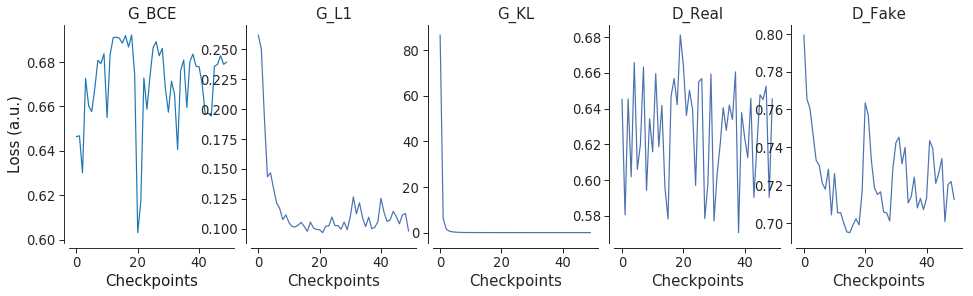

In [10]:
vis.loss(solver.train_loss_history['cvae'])